# 3.3 - İstatistik'e Giriş: İstatistiksel Dağılımlar

### Soru 1:
**dağılım = np.random.dağılım_adı([ ],[ ])** kodunu kullanarak, dağılım_adı yazan yere seçtiğiniz bir dağılımı ve parantez içinde **[ ]** şeklinde gösterilen boşlukları yine kendi seçiminiz doğrultusunda doldurun. Daha sonra,<br>a) Verinin histogramını çiziniz<br>b) Q-Q grafiğini çizip yorumlayınız

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom, uniform
import seaborn as sns
sns.set()

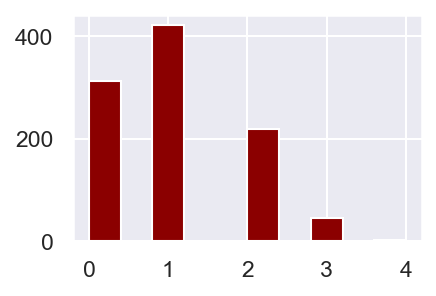

In [2]:
# iskambil destesinde, seçilen 4 karttan birinin kupa, maça, karo veya sinek kart arasından gelmesi
np.random.seed(1)
dagilim = np.random.binomial(4, 1/4, 1000)
plt.figure(figsize=(3,2),dpi=150)
plt.hist(dagilim, color="darkred")

plt.show()

In [3]:
print(list(dagilim).count(0), "vakada, seçtiğimiz türde kart hiç gelmemiş.")
print(list(dagilim).count(1), "vakada, gelen dörtlüden sadece 1'i bizim seçtiğimiz kartmış.")
print(list(dagilim).count(2), "vakada, kartların yarısında bizim seçtiğimiz kart gelmiş.")
print(list(dagilim).count(3), "vakada, yalnızca 1 kart seçtiğimiz karttan değilmiş.")
print(list(dagilim).count(4), "vakada, tüm kartlar bizim seçtiğimiz türden gelmiş.")

313 vakada, seçtiğimiz türde kart hiç gelmemiş.
421 vakada, gelen dörtlüden sadece 1'i bizim seçtiğimiz kartmış.
219 vakada, kartların yarısında bizim seçtiğimiz kart gelmiş.
45 vakada, yalnızca 1 kart seçtiğimiz karttan değilmiş.
2 vakada, tüm kartlar bizim seçtiğimiz türden gelmiş.


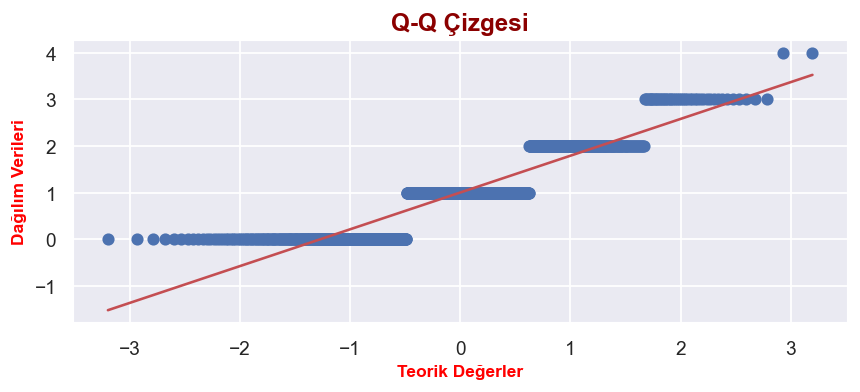

In [4]:
from scipy import stats

plt.figure(figsize=(8,3), dpi=125)
title_dict={"family":"arial", "color":"darkred", "weight":"bold", "size":14}
axis_dict = {"family":"arial", "color":"red", "weight":"bold", "size":10}
stats.probplot(dagilim, plot=plt)

plt.title("Q-Q Çizgesi", fontdict=title_dict)
plt.xlabel("Teorik Değerler", fontdict=axis_dict)
plt.ylabel("Dağılım Verileri", fontdict=axis_dict)

plt.show()

### Soru 2:
https://finance.yahoo.com/ sitesini kullanarak Google şirketinin 2015-2017 yılları arasında hisse senedi fiyatlarını elde edin. Bu veriyi kullanarak hisse senedi getirisini şu formülle hesaplayın:<br>
$ P_t - P_{t-1} / P_{t-1}$ <br>
(burada $P_{t}$, t zamanındaki hisse senedi fiyatını ve $P_{t-1}$ ise t-1 zamanındaki hisse senedi fiyatını vermektedir). Getiriler dağılımı hangi dağılıma daha yakındır?<br>

**Not:** https://finance.yahoo.com/ adresinden veri şu şekilde çekilir. Verilen adres tıkladıktan sonra arama bölümüne aramak istediğiniz hisse senedinin adını yazın (ör: google). Arama sonucu altta çıkan sonuca tıklayarak ilgili hisse senedine gidiniz. İlgili hisse senedinin bilgilerinin bulunduğu sayfaya geldiğinizde Historical Prices (Geçmiş veriler) sekmesine tıklayın ve ilgili tarih aralığını seçtikten sonra Apply'a tıklayın. Son olarak Download Data butonuna basarak veriyi indirin.

In [5]:
google = pd.read_csv("GOOG.csv")
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500
...,...,...,...,...,...,...,...
750,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
751,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
752,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
753,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


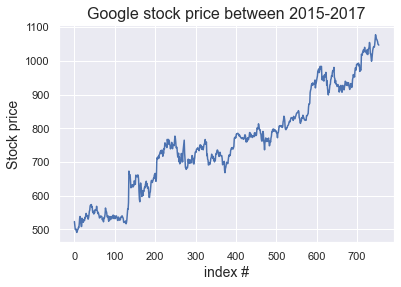

In [6]:
# ilk önce, hisse senetlerinin hareketlerini inceleyelim
plt.plot(google.index, google["Close"])
plt.xlabel("index #", fontsize=14)
plt.ylabel("Stock price", fontsize=14)
plt.title("Google stock price between 2015-2017", fontsize=16)
plt.show()

In [7]:
difference = [None]
i=0
while i<len(google.index)-1:
    difference.append(google.Close[i+1]-google.Close[i])
    i+=1
google.insert(5, "Difference", difference, False)

c:\program files (x86)\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\program files (x86)\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


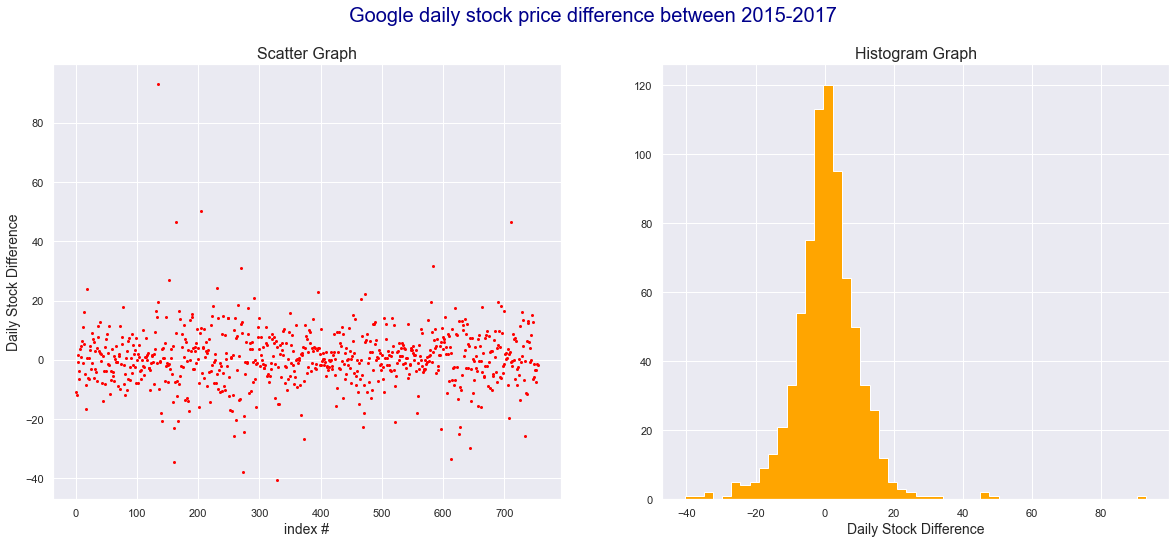

In [8]:
plt.figure(figsize=(20,8))
plt.suptitle("Google daily stock price difference between 2015-2017", fontsize=20, color="darkblue")
plt.subplot(121)
plt.scatter(x = google.index, 
            y = google.Difference,
            color="red", 
            marker="o", 
            s=4)
plt.title("Scatter Graph", fontsize=16)
plt.xlabel("index #", fontsize=14)
plt.ylabel("Daily Stock Difference", fontsize=14)

plt.subplot(122)
plt.hist(google.Difference, color="orange", bins=50, histtype="stepfilled")
plt.title("Histogram Graph", fontsize=16)
plt.xlabel("Daily Stock Difference", fontsize=14)

plt.show()

In [13]:
print(f"Mean value of the stock difference: {np.mean(google.Difference):.3f}")

Mean value of the stock difference: 0.694


1) Soldaki grafiği gözlemlediğimiz zaman, hisse senetlerindeki günlük fark dağılımın "Tekdüze (Uniform) Dağılım" kategorisine girdiğini görebiliyoruz.<br>
2) Sağdaki grafik ise bize değişim miktarının normal dağılımını vermekte, değişim miktarının ise 0 etrafında toplandığını anlatmaktadır. <br>"Difference" değişkeninin ortalamasının da 0.694 olduğunu düşünürsek, "Getiriler dağılımı"nın uniform dağılım olduğunu tasdik etmiş oluruz.